Kaggle Dataset Link:
https://www.kaggle.com/datasets/omkargurav/face-mask-dataset


In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Importing Face Mask Dataset

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
100% 163M/163M [00:08<00:00, 22.8MB/s]
100% 163M/163M [00:08<00:00, 19.1MB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


**Importing the Dependencies**

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3194.jpg', 'with_mask_2839.jpg', 'with_mask_1406.jpg', 'with_mask_782.jpg', 'with_mask_1437.jpg']
['with_mask_1006.jpg', 'with_mask_2006.jpg', 'with_mask_3608.jpg', 'with_mask_2404.jpg', 'with_mask_1660.jpg']


In [7]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_854.jpg', 'without_mask_41.jpg', 'without_mask_2649.jpg', 'without_mask_453.jpg', 'without_mask_1410.jpg']
['without_mask_1407.jpg', 'without_mask_3612.jpg', 'without_mask_967.jpg', 'without_mask_2723.jpg', 'without_mask_2555.jpg']


In [8]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [9]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [10]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [11]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [12]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

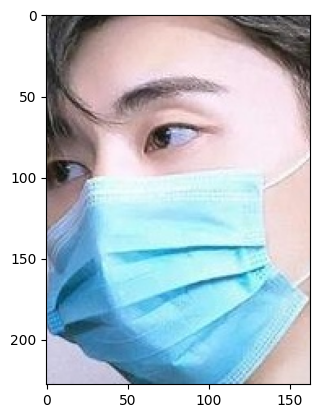

In [13]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

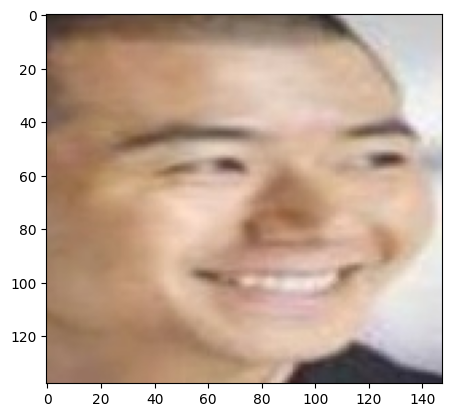

In [14]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [15]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [16]:
type(data)

list

In [17]:
len(data)

7553

array([[[251, 248, 233],
        [250, 247, 232],
        [251, 248, 232],
        ...,
        [249, 242, 222],
        [249, 242, 222],
        [249, 243, 222]],

       [[251, 247, 232],
        [250, 247, 232],
        [251, 248, 232],
        ...,
        [249, 241, 223],
        [249, 241, 222],
        [249, 242, 222]],

       [[251, 248, 233],
        [251, 248, 233],
        [251, 248, 233],
        ...,
        [249, 242, 224],
        [249, 242, 223],
        [249, 242, 223]],

       ...,

       [[ 84,  88,  94],
        [ 70,  73,  79],
        [ 67,  70,  75],
        ...,
        [ 50,  51,  48],
        [ 54,  55,  52],
        [ 57,  57,  56]],

       [[ 85,  88,  95],
        [ 71,  74,  80],
        [ 66,  68,  73],
        ...,
        [ 51,  51,  48],
        [ 53,  55,  52],
        [ 58,  58,  55]],

       [[ 83,  86,  93],
        [ 70,  73,  79],
        [ 65,  68,  72],
        ...,
        [ 50,  50,  47],
        [ 54,  54,  52],
        [ 58,  58,  56]]], dtype=uint8)
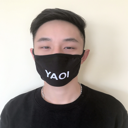

In [18]:
data[0]

In [19]:
type(data[0])

numpy.ndarray

In [20]:
data[0].shape

(128, 128, 3)

In [21]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [22]:
type(X)

numpy.ndarray

In [23]:
type(Y)

numpy.ndarray

In [24]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [25]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [28]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[199, 188, 186],
        [200, 189, 187],
        [202, 191, 189],
        ...,
        [195, 202, 226],
        [191, 200, 223],
        [198, 209, 233]],

       [[203, 192, 190],
        [203, 192, 190],
        [204, 193, 191],
        ...,
        [195, 201, 225],
        [191, 200, 223],
        [199, 210, 231]],

       [[205, 194, 192],
        [204, 193, 191],
        [204, 193, 191],
        ...,
        [195, 202, 224],
        [191, 199, 220],
        [193, 204, 224]],

       ...,

       [[ 11,  12,   7],
        [ 12,  13,   8],
        [ 12,  13,   8],
        ...,
        [ 17,  18,  14],
        [ 16,  17,  13],
        [ 14,  15,  11]],

       [[ 11,  12,   7],
        [ 12,  13,   8],
        [ 12,  13,   8],
        ...,
        [ 17,  18,  12],
        [ 16,  17,  11],
        [ 12,  13,   8]],

       [[ 11,  11,   9],
        [ 12,  12,  10],
        [ 12,  12,  10],
        ...,
        [ 20,  21,  16],
        [ 18,  19,  14],
        [ 13,  14,   9]]], dtype=uint8)
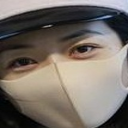

In [29]:
X_train[0]

In [30]:
X_train_scaled[0]

array([[[0.78039216, 0.7372549 , 0.72941176],
        [0.78431373, 0.74117647, 0.73333333],
        [0.79215686, 0.74901961, 0.74117647],
        ...,
        [0.76470588, 0.79215686, 0.88627451],
        [0.74901961, 0.78431373, 0.8745098 ],
        [0.77647059, 0.81960784, 0.91372549]],

       [[0.79607843, 0.75294118, 0.74509804],
        [0.79607843, 0.75294118, 0.74509804],
        [0.8       , 0.75686275, 0.74901961],
        ...,
        [0.76470588, 0.78823529, 0.88235294],
        [0.74901961, 0.78431373, 0.8745098 ],
        [0.78039216, 0.82352941, 0.90588235]],

       [[0.80392157, 0.76078431, 0.75294118],
        [0.8       , 0.75686275, 0.74901961],
        [0.8       , 0.75686275, 0.74901961],
        ...,
        [0.76470588, 0.79215686, 0.87843137],
        [0.74901961, 0.78039216, 0.8627451 ],
        [0.75686275, 0.8       , 0.87843137]],

       ...,

       [[0.04313725, 0.04705882, 0.02745098],
        [0.04705882, 0.05098039, 0.03137255],
        [0.04705882, 0

**Building a Convolutional Neural Networks (CNN)**

In [31]:
import tensorflow as tf
from tensorflow import keras

In [32]:
num_of_classes = 2

model = keras.Sequential([

keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
keras.layers.MaxPooling2D(),


keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
keras.layers.MaxPooling2D(),

keras.layers.Flatten(),

keras.layers.Dense(128, activation='relu'),
keras.layers.Dropout(0.5),

keras.layers.Dense(64, activation='relu'),
keras.layers.Dropout(0.5),


keras.layers.Dense(num_of_classes, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [34]:
# training the neural network
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 17s 60ms/step - acc: 0.6815 - loss: 0.6529 - val_acc: 0.8843 - val_loss: 0.3080
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - acc: 0.8690 - loss: 0.3213 - val_acc: 0.8926 - val_loss: 0.2479
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9022 - loss: 0.2535 - val_acc: 0.9190 - val_loss: 0.1870
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9263 - loss: 0.1867 - val_acc: 0.9107 - val_loss: 0.1975
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9333 - loss: 0.1650 - val_acc: 0.9223 - val_loss: 0.1740


**Model Evaluation**

In [35]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.9248 - loss: 0.2155
Test Accuracy = 0.9278623461723328


In [36]:
model.predict(X_test[0].reshape(1,128,128,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


array([[0., 1.]], dtype=float32)

In [37]:
Y_test[0]

1

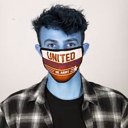

In [38]:
cv2_imshow(X_test[0])

In [39]:
model.predict(X_test[-1].reshape(1,128,128,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[1., 0.]], dtype=float32)

In [40]:
Y_test[-1]

0

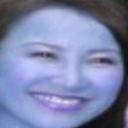

In [41]:
cv2_imshow(X_test[-1])

**Predictive System**

In [42]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: 1


AttributeError: 'NoneType' object has no attribute 'clip'

In [ ]:
model.save("mask_detection_model.h5")


In [ ]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

with open("mask_detection_modell.tflite", "wb") as f:
    f.write(tflite_model)